In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Extraction and Analysis 

In [2]:
titanic_df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
#pd.set_option("display.max_rows", None, "display.max_columns", None)

titanic_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [4]:
titanic_df[titanic_df['Cabin'].isnull() & titanic_df['Survived'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C


In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### **I see that Age, Cabin and Emnarked have all some null value. Let's try fill out those missing values**

In [7]:
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### **Lets look at age countplot** ###

In [8]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Age', ylabel='count'>

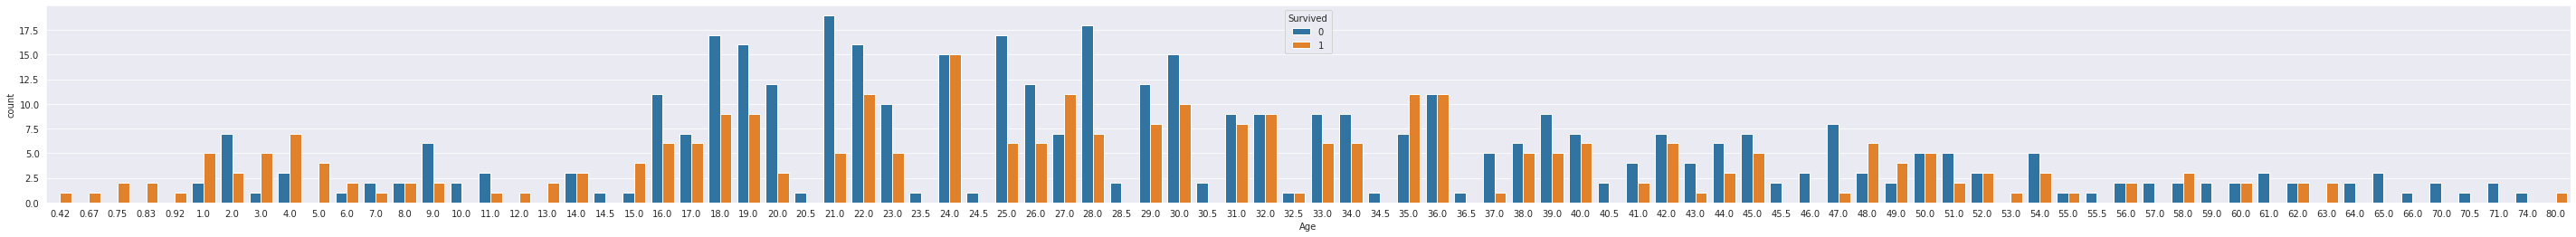

In [9]:
plt.figure(figsize=(50,4))
sns.countplot(x = 'Age',data = titanic_df, hue = 'Survived')

#### **Ok as the age has a standard devition of 14, though it turns out we can try filling out the null values by mean value and also as part of feature engineering we will classify the age in to different categories** ####

In [10]:
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
values = {"Age": titanic_df['Age'].mean}

titanic_df.fillna(value=values)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,<bound method NDFrame._add_numeric_operations....,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:>

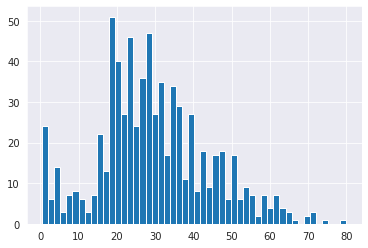

In [13]:
titanic_df['Age'].hist(bins = 50)

### **Going to classify age as per the countplot** ###

In [14]:
def classiyfAge(age):  
    if(age > 0 and age < 15):
        return '0-15';
    elif(age > 15 and age < 45):
        return '15-45'
    else:
        return '45+'

In [15]:
titanic_df['Age'] = titanic_df['Age'].apply(lambda x: classiyfAge(x))

#### **Let's take look at Cabin** ####

In [16]:
titanic_df.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [17]:
titanic_df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [18]:
titanic_df.Cabin.nunique()

147

#### **It seems the number of unique values are 147 out 158 non null cabin values which is about 93% from the available data. Hence, need to drop this column as well** ####

In [19]:
#titanic_df.drop('Cabin', inplace = True, axis = 1)

#### **The number of embarked rows that have null values are 2 which very low, therefore instead of dropping the whole column we just drop the empty rows** #### 

In [20]:
titanic_df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,15-45,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,15-45,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,45+,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,0-15,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,45+,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,45+,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,15-45,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,45+,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,15-45,0,0,112053,30.0000,B42,S


### **Lets take a look at fare** ###

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

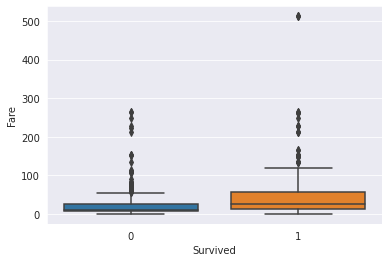

In [21]:
sns.boxplot(y = 'Fare' , x = 'Survived' , data = titanic_df)

<AxesSubplot:xlabel='Fare', ylabel='count'>

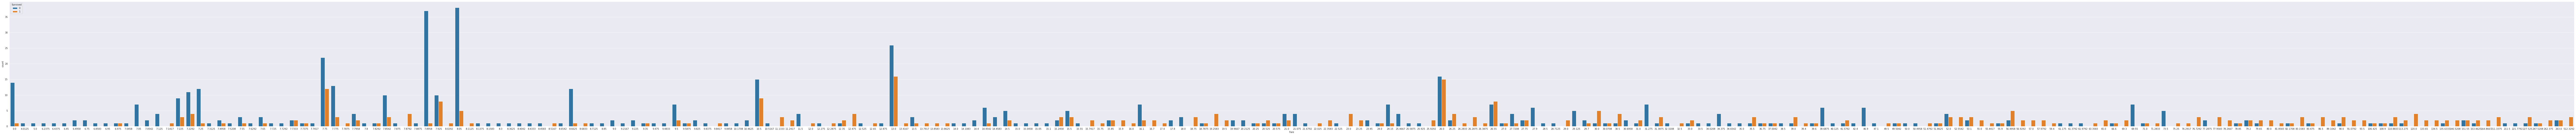

In [22]:
plt.figure(figsize = (200,10))
sns.countplot(x='Fare',hue = 'Survived',data = titanic_df)

### **Going to classify fare as per the countplot** ###

In [23]:
def classifyFare(Fare):
    
     if(Fare>30 and Fare <50):
        return 'Medium Fare';
     elif(Fare > 50):
        return 'High Fare';
     else:
        return 'Low Fare';

In [24]:
titanic_df['Fare'] = titanic_df['Fare'].apply(lambda x : classifyFare(x))

#### **It seems the fare is slightly co-related but we may get some patterns on that** ####

<AxesSubplot:xlabel='Embarked', ylabel='count'>

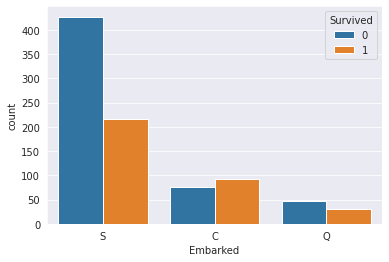

In [25]:
sns.countplot(x = 'Embarked', hue = 'Survived' , data = titanic_df)

### **Checking out various other features** ###

<AxesSubplot:xlabel='SibSp', ylabel='count'>

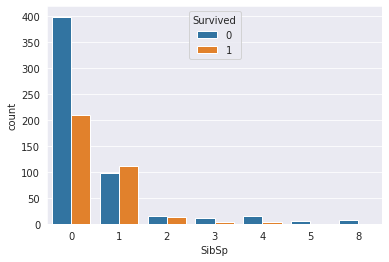

In [26]:
sns.countplot(x = 'SibSp', hue = 'Survived' , data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

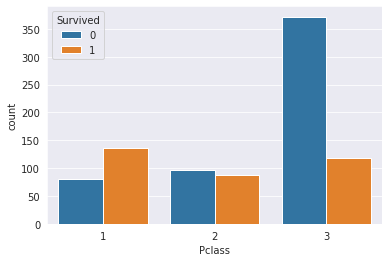

In [27]:
sns.countplot(x = 'Pclass', hue = 'Survived' , data = titanic_df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

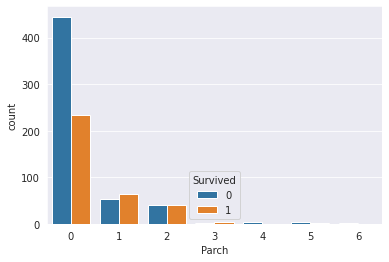

In [28]:
sns.countplot(x = 'Parch', hue = 'Survived' , data = titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

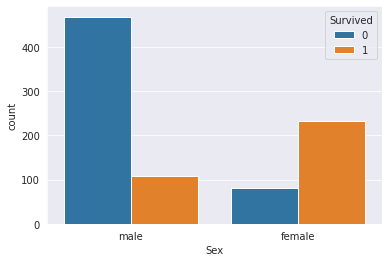

In [29]:
sns.countplot(x = 'Sex', hue = 'Survived' , data = titanic_df)

#### **The above features seems to have co-relation so we should be including it** ####

In [30]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    object
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    object
 10  Cabin        204 non-null    object
 11  Embarked     889 non-null    object
dtypes: int64(5), object(7)
memory usage: 83.7+ KB


#### **The ticket feature has majority unique values and it is string value,hence we need to drop this column** ####

In [31]:
titanic_df.drop('Ticket', inplace = True, axis =1)

#### **The passengerId and Name are use for identification thus I am removing the columns** ####

In [32]:
titanic_df.drop(['PassengerId', 'Name'] , inplace = True, axis =1)

# Modeling

#### **I will use various models to predtict the outcome(each model will have seprate file)** ####

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
#test_data.dropna()


features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Age","Fare"]
#X = pd.get_dummies(titanic_df[features])
#X_test = pd.get_dummies(test_data[features])

X = pd.get_dummies(titanic_df[features],drop_first= True)
y = titanic_df["Survived"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.svm import SVC

In [37]:
estimators = [('LC',LogisticRegression()),
...               ('NC', NearestCentroid()),
...               ('SVC', SVC(kernel='rbf',probability=True))]

In [38]:
from sklearn.ensemble import StackingClassifier

In [39]:
final_estimator = LogisticRegression()
model = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [40]:
model = model.fit(X_train, y_train)

In [41]:
model.fit(X_train, y_train)

StackingClassifier(estimators=[('LC', LogisticRegression()),
                               ('NC', NearestCentroid()),
                               ('SVC', SVC(probability=True))],
                   final_estimator=LogisticRegression())

In [42]:
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

[[141  16]
 [ 32  79]]


              precision    recall  f1-score   support

           0       0.82      0.90      0.85       157
           1       0.83      0.71      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



<AxesSubplot:>

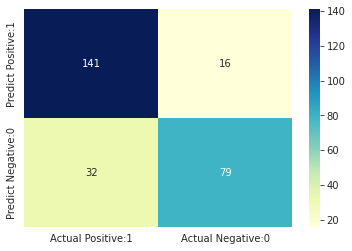

In [44]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [45]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [46]:
test_data.Age.unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [48]:
values = {"Age": test_data['Age'].mean}

test_data.fillna(value=values)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,<bound method NDFrame._add_numeric_operations....,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,<bound method NDFrame._add_numeric_operations....,0,0,359309,8.0500,NaN,S


In [49]:
test_data['Age'] = test_data['Age'].apply(lambda x: classiyfAge(x))
test_data['Fare'] = test_data['Fare'].apply(lambda x : classifyFare(x))

In [50]:
features = ["Pclass", "Sex", "SibSp", "Parch","Embarked", "Age","Fare"]
X_test1 = pd.get_dummies(test_data[features],drop_first= True).values

In [51]:
#model.fit(x=X1, y = y1)
#y_pred=(model.predict(X_test) > 0.5).astype("int32")
predictions = model.predict(X_test1)
predictions = np.reshape(predictions, 418)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
